##**BHOOPENDRA KUMAR**
##**TASK-2**
##**Prediction using Unsupervised ML**

##**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

##**Import Data Set**

In [ ]:
# Load the iris dataset
iris = pd.read_csv('/content/drive/MyDrive/grip intrenship/Iris.csv')
print(iris.shape)

(150, 6)


In [ ]:
iris_df=iris.drop('Id',axis=1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris_df.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
4.9            3.1           1.5            0.1           Iris-setosa        3
5.8            2.7           5.1            1.9           Iris-virginica     2
5.4            3.4           1.7            0.2           Iris-setosa        1
5.5            2.5           4.0            1.3           Iris-versicolor    1
               2.4           3.8            1.1           Iris-versicolor    1
                                                                            ..
6.3            2.5           4.9            1.5           Iris-versicolor    1
               2.3           4.4            1.3           Iris-versicolor    1
6.2            3.4           5.4            2.3           Iris-virginica     1
               2.9           4.3            1.3           Iris-versicolor    1
4.3            3.0           1.1            0.1           Iris-setosa        1
Length: 147, dtype: int64

##**Visulization of Data Set**

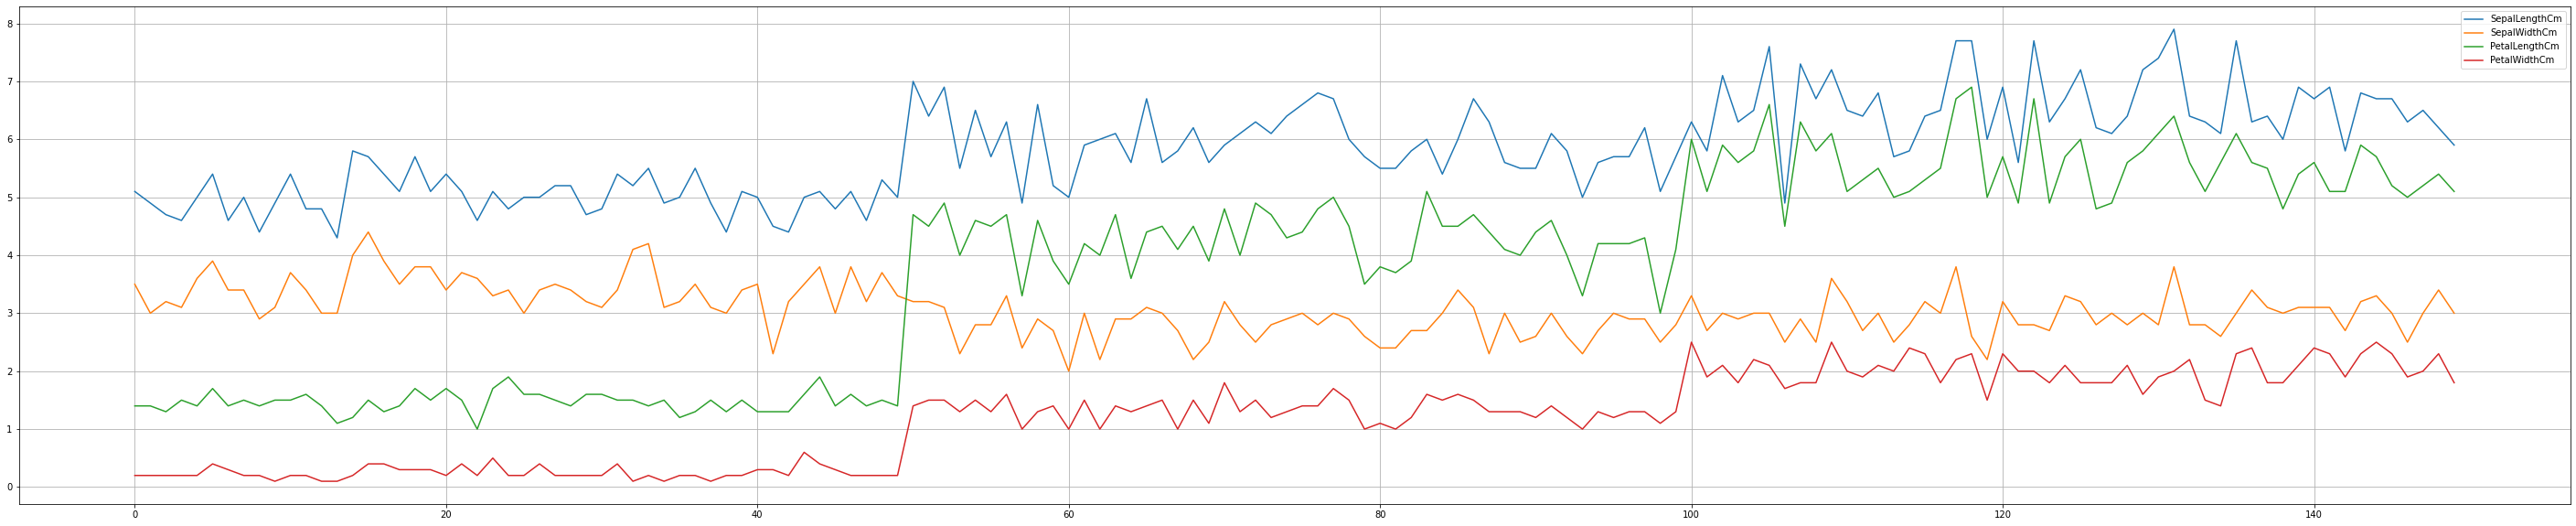

In [ ]:
iris_df.plot(kind='line',figsize=(50,10),grid=True)

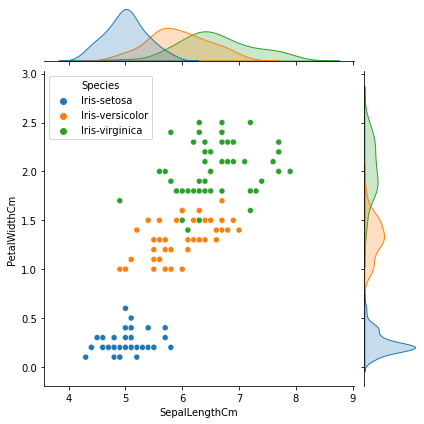

In [ ]:
sns.jointplot(data=iris, x="SepalLengthCm", y='PetalWidthCm',hue="Species")

## **Make Training Data set**

In [ ]:
X=iris.drop(['Id','Species'],axis=1).values
print(X.shape)
y=iris['Species'].values
z=np.unique(y)
print(z)

(150, 4)
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## **Using the elbow method to find the optimal number of clusters**

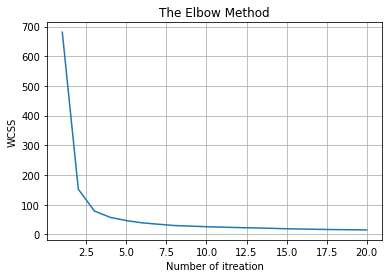

In [ ]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of itreation')
plt.ylabel('WCSS')
plt.show()

##**Training the K-Means model on the dataset**

In [ ]:
kmeans = KMeans(n_clusters = len(z), init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(X)

## **Visualising the clusters**

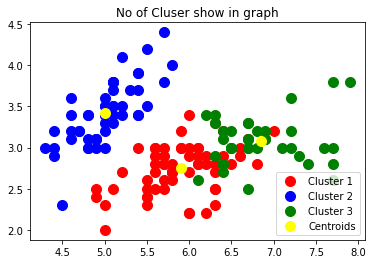

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('No of Cluser show in graph')
plt.legend()
plt.show()